In [1]:
 #####     10 Use the ‘Student performance’ dataset to answer the questions given below:

In [2]:
###    (a)	Fit a logistic model using ‘test preparation course’ as the dependent variable. (3 marks)

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
Df=pd.read_csv('StudentsPerformance.csv')

In [5]:
Df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
Df.shape

(1000, 8)

In [7]:
Df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
Df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [9]:
#since there are only two categories, we will assume none as 0 and completed to be 1

In [10]:
Df['test preparation course'].replace(['none','completed'],[0,1],inplace=True)

In [11]:
Df['test preparation course'].unique()

array([0, 1], dtype=int64)

In [12]:
Df.groupby('test preparation course').size()

test preparation course
0    642
1    358
dtype: int64

In [13]:
#There are 358 students who has completed the test preparatory course

In [14]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null int64
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [15]:
Df['gender'].replace(['female','male'],[0,1],inplace=True)

In [16]:
Df.groupby('gender').size()

gender
0    518
1    482
dtype: int64

In [17]:
#There are 518 females and 482 males in the dataset

In [18]:
Df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [19]:
Df['race/ethnicity'].replace(['group A','group B','group C','group D','group E'],[0,1,2,3,4],inplace=True)

In [20]:
Df['lunch'].replace(['standard','free/reduced'],[1,0],inplace=True)

In [21]:
Df.corr().T

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.001502,0.021372,0.006028,0.167982,-0.244313,-0.301225
race/ethnicity,-0.001502,1.000000,0.046563,0.017508,0.216415,0.145253,0.165691
lunch,0.021372,0.046563,1.000000,-0.017044,0.350877,0.229560,0.245769
test preparation course,0.006028,0.017508,-0.017044,1.000000,0.177702,0.241780,0.312946
math score,0.167982,0.216415,0.350877,0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,0.145253,0.229560,0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,0.165691,0.245769,0.312946,0.802642,0.954598,1.000000


C:\Users\Ashok\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


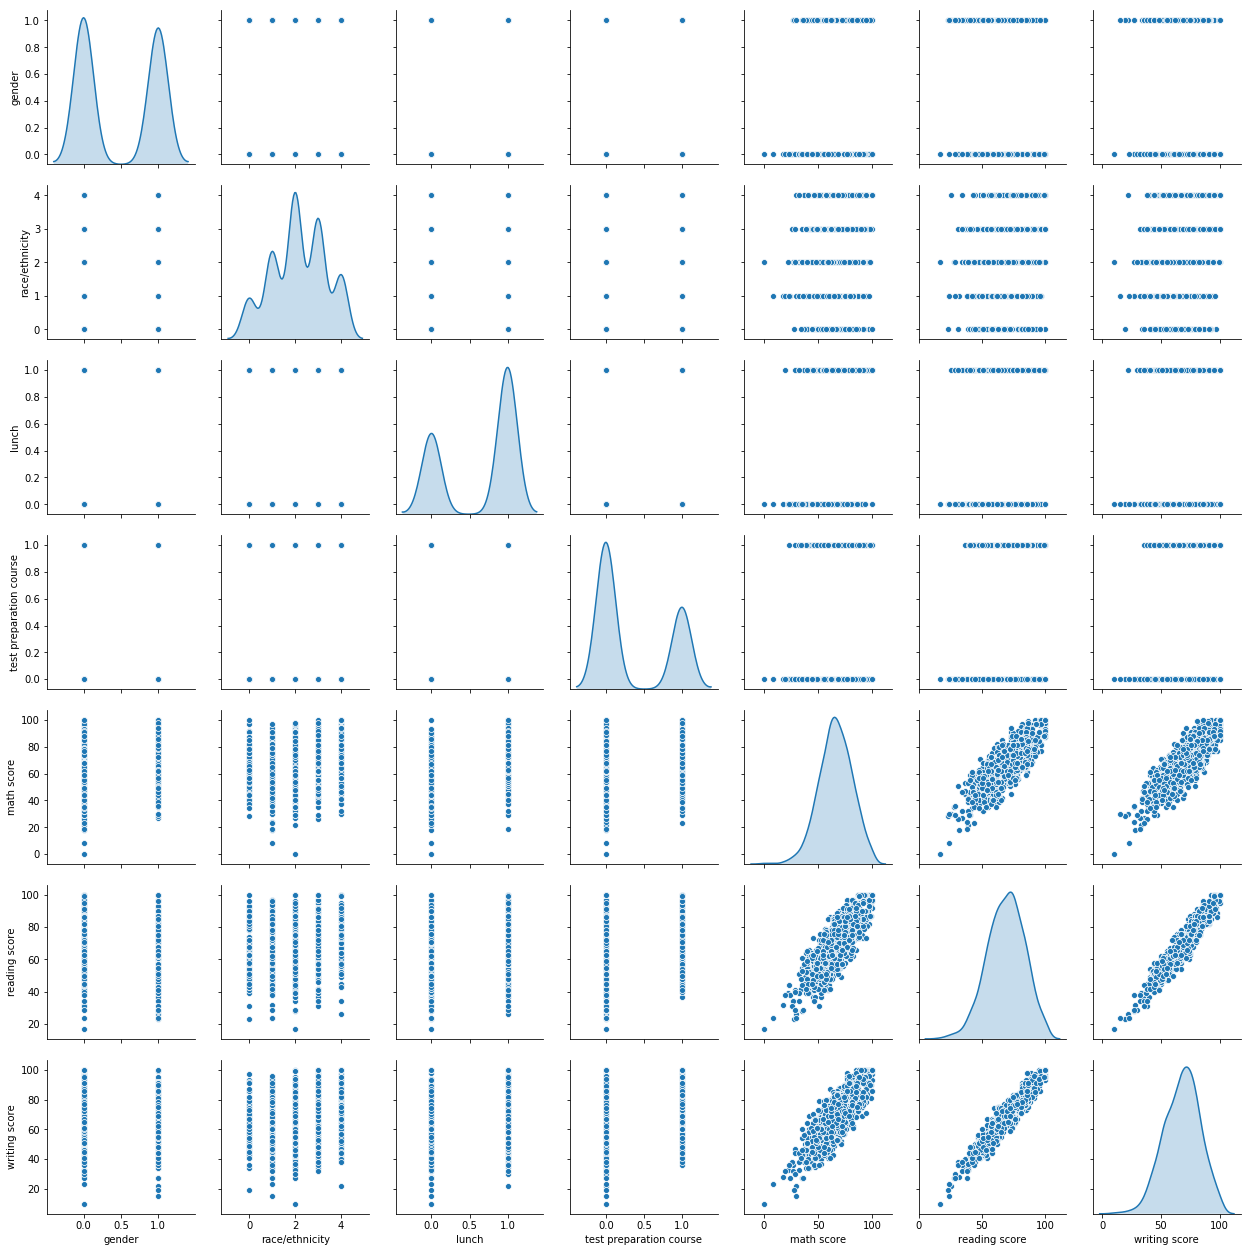

In [22]:
sns.pairplot(Df,diag_kind='kde')

In [23]:
#From the pairplot and corr plot we can see that the continous variables math score, reading score, writing score highly multi corelated

In [24]:
#since math score, reading score, and writing score are multi correlated, we will take the best correlated variables

In [25]:
#Hence will take the first 3 variables which are highly correlated and drop the variables which are less corelated

In [26]:
Df1=Df.drop(['lunch','race/ethnicity','gender'],axis=1)

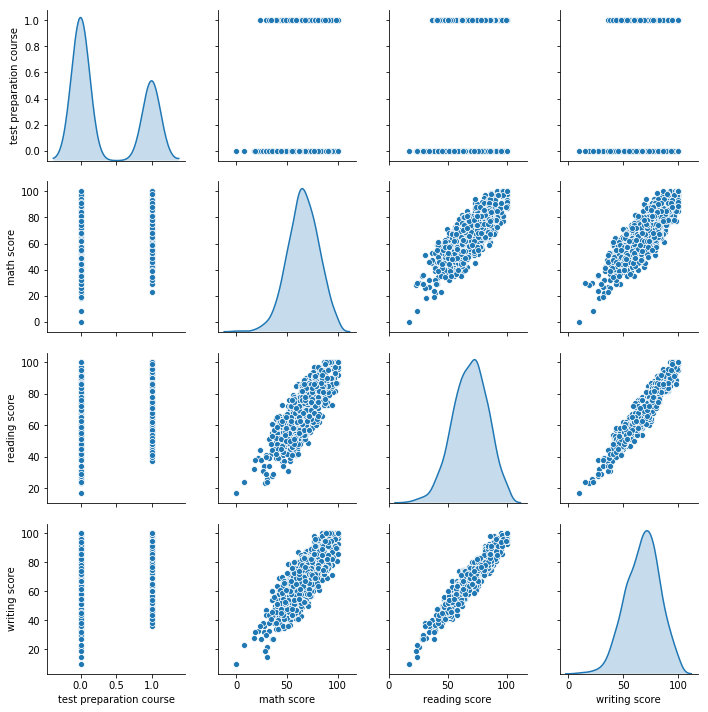

In [27]:
sns.pairplot(Df1,diag_kind='kde')

In [28]:
X=Df.drop(['test preparation course','parental level of education','gender','race/ethnicity','lunch'],axis=1)
Y=Df['test preparation course']

In [29]:
X.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [30]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: test preparation course, dtype: int64

In [31]:
from sklearn import metrics
from sklearn.model_selection import KFold

In [32]:
kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[]
for train,test in kf.split(X,Y):
    Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
    Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
    model=LogisticRegression()
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest,Y_predict))
print(acc)
print("Cross_Validated_Accuracy_score: %0.03f (+/- %0.5f)" % (np.mean(acc),np.var(acc,ddof=1)))   

[0.6976047904191617, 0.6426426426426426, 0.6996996996996997]
Cross_Validated_Accuracy_score: 0.680 (+/- 0.00105)


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
X1=Df.drop(['test preparation course','parental level of education','gender','race/ethnicity','lunch','math score'],axis=1)
Y=Df['test preparation course']

In [47]:
X1.head()

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75


In [34]:
kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[]
for train,test in kf.split(X1,Y):
    Xtrain,Xtest=X1.iloc[train,:],X1.iloc[test,:]
    Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
    model=LogisticRegression()
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest,Y_predict))
print(acc)
print("Cross_Validated_Accuracy_score: %0.03f (+/- %0.5f)" % (np.mean(acc),np.var(acc,ddof=1)))   

[0.7035928143712575, 0.6336336336336337, 0.6996996996996997]
Cross_Validated_Accuracy_score: 0.679 (+/- 0.00155)


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
X2=Df.drop(['test preparation course','parental level of education','gender','race/ethnicity','lunch','math score','reading score'],axis=1)
Y=Df['test preparation course']

In [48]:
X2.head()

,writing score
0,74
1,88
2,93
3,44
4,75


In [36]:
kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[]
for train,test in kf.split(X2,Y):
    Xtrain,Xtest=X2.iloc[train,:],X2.iloc[test,:]
    Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
    model=LogisticRegression()
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest,Y_predict))
print(acc)
print("Cross_Validated_Accuracy_score: %0.03f (+/- %0.5f)" % (np.mean(acc),np.var(acc,ddof=1)))   

[0.6916167664670658, 0.6306306306306306, 0.6906906906906907]
Cross_Validated_Accuracy_score: 0.671 (+/- 0.00122)


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
### (b)	What are the most significant variables influencing ‘test preparation course’ status. (2 marks)

In [38]:
# The most significant variables influencing 'test preparation course’ are math score, reading score and writing score

In [39]:
## (c)	Prepare the classification matrix and evaluate the precision and recall scores. (2 marks)

In [40]:
model=LogisticRegression()
model.fit(Xtrain,Ytrain)
ypred=model.predict(Xtest)
acc=metrics.accuracy_score(Ytest,ypred)
cm=metrics.confusion_matrix(Ytest,ypred)
cr=metrics.classification_report(Ytest,ypred)
print(cm)

[[202  14]
 [ 89  28]]


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
#1)From the confusion matrix we can conclude that, the model is predicting 1 as 42, out of which 28 are correct, thi is the precision for 1's, hence 0.67 in the below table.
#2)The model is predicting 0 as 291, out of which 202 are correct, thi is the precision for 0's, hence 0.69 in the below table.
#3)Recall for 0 is, 202/216 = 0.94
#4) Recall for 1 is 28/117 = 0.24

In [42]:
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.94      0.80       216
           1       0.67      0.24      0.35       117

   micro avg       0.69      0.69      0.69       333
   macro avg       0.68      0.59      0.57       333
weighted avg       0.68      0.69      0.64       333



In [43]:
# Among X,X1,X2 models,  X-model has the better precision, recall scores

In [44]:
##                     Question 6

In [45]:
#Given the following logistic model: Predicted logit (Y) = -6.3896 + 0.0266 (X1) - 0.0208 (X2) +1.0790 (X3) What is the predicted probability of Y = 1 given that X1=10, X2=69 and X3=5?


In [46]:
ypred=1/(1+np.exp(-(-6.3896)-(0.0266)*10-(-0.0208)*69-(1.0790)*5))
ypred

0.10304868858296147